In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre

## Import data

In [2]:
gender_submission = pd.read_csv("gender_submission.csv")
print("GENDER_SUBMISSION: " + str(gender_submission.head()))
print(gender_submission.describe())
# What is gender_submission.csv even used for?

GENDER_SUBMISSION:    PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


In [5]:
train = pd.read_csv("train.csv")
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
test = pd.read_csv("train.csv")
print(test.describe())
print(test.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

## Clean and explore

In [7]:
# Drop some columns that are probably not useful. Maybe explore these later.
# Ticket, Name, Embarked

# TODO: Convert cabin. NaNs=0; A=1; B=2; etc. Theory is cabins correspond to a location on the ship and 
#    survival is a function of location

print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
#obj_columns = train.select_dtypes(include=['object']).columns

train_clean = train.copy()

# Convert sex to integer. 0->Female, 1->Male
lenc = pre.LabelEncoder().fit(train_clean.Sex.unique())
train_clean.Sex = lenc.transform(train_clean.Sex)

# Also try converting object columns to one hot encoded columns
"""
train_hots = train.copy()
#cat_features = ['color', 'director_name', 'actor_2_name']
lenc = pre.LabelEncoder()
new_cat_features = new_cat_features.reshape(-1, 1) # Needs to be the correct shape
ohe = pre.OneHotEncoder(sparse=False) #Easier to read
print(ohe.fit_transform(new_cat_features))
# print(enc.transform(train_cats["Sex"]))

print(train_cats["Embarked"])
"""


'\ntrain_hots = train.copy()\n#cat_features = [\'color\', \'director_name\', \'actor_2_name\']\nlenc = pre.LabelEncoder()\nnew_cat_features = new_cat_features.reshape(-1, 1) # Needs to be the correct shape\nohe = pre.OneHotEncoder(sparse=False) #Easier to read\nprint(ohe.fit_transform(new_cat_features))\n# print(enc.transform(train_cats["Sex"]))\n\nprint(train_cats["Embarked"])\n'

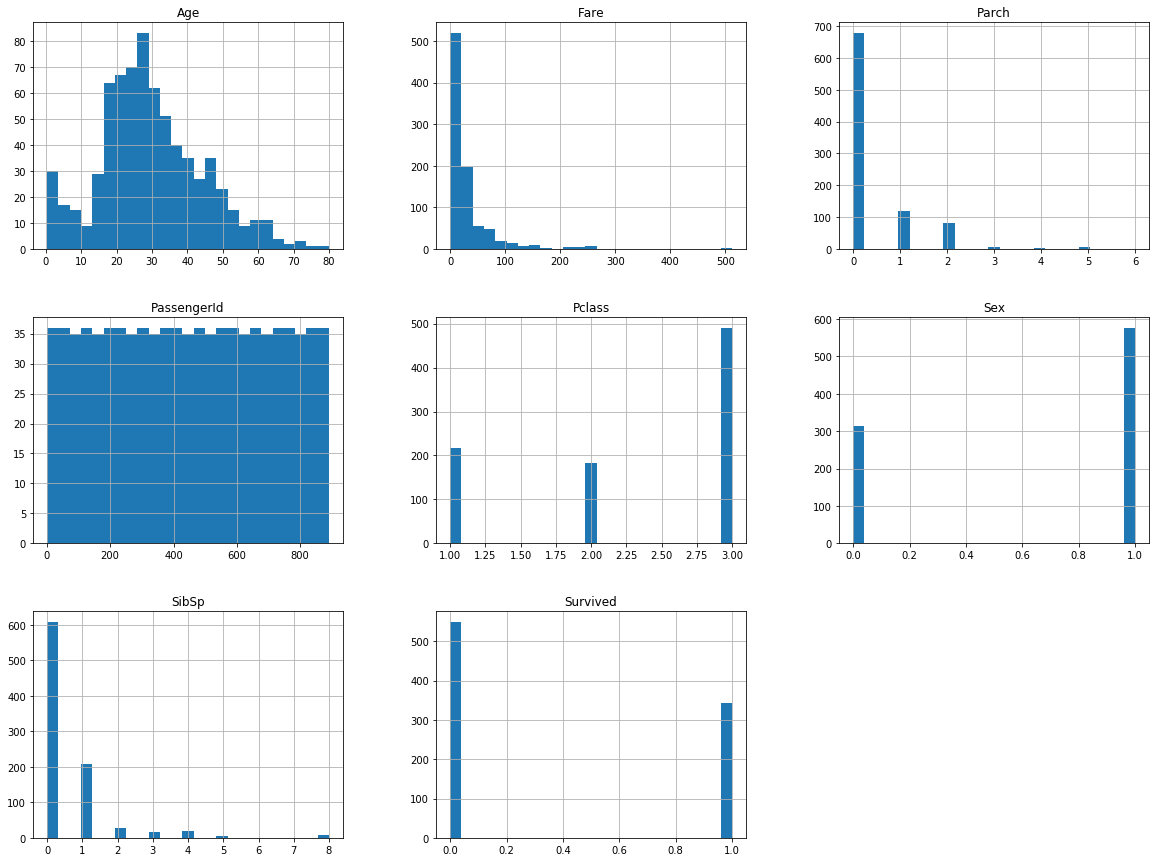

In [9]:
plt = train_clean.hist(bins=25, figsize=(20,15) )

Not really much to glean from that...

#### Other stuff

In [36]:
corr_matrix = train_clean.corr()
corr = corr_matrix["Survived"].sort_values(ascending=False)
print(corr)

to_normalize = ["Age", "Fare", "Parch", "Pclass", "SibSp"]
f = lambda col: (col - col.mean())/(col.max() - col.min())
x_train_norm = train_clean.copy()
x_train_norm[to_normalize] = train_clean[to_normalize].apply(f, axis=1)

corr_matrix = x_train_norm.corr()
corr = corr_matrix["Survived"].sort_values(ascending=False)
print(corr)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64
Survived    1.000000
Fare        0.280997
Parch       0.062490
SibSp      -0.009359
Pclass     -0.186679
Age        -0.334896
Sex        -0.543351
Name: Survived, dtype: float64


In [34]:
# Drop columns with low correlation
train_clean = train_clean.drop(["PassengerId"], axis=1)

KeyError: "labels ['PassengerId'] not contained in axis"

Noice.

In [29]:
train_clean["Pclass"].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB
None


In [28]:
train_clean[["Pclass", "Fare"]].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


^ These are strongly correlated. Group? 

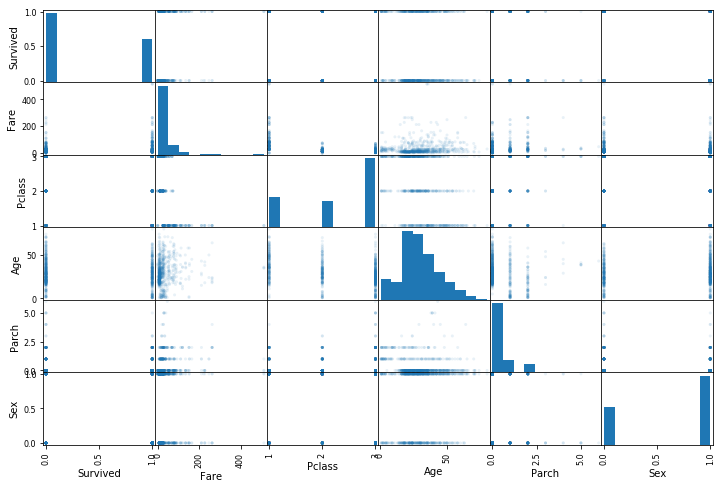

In [16]:
#from pandas.tools.plotting import scatter_matrix
scatter = pd.plotting.scatter_matrix(
    train_clean[["Survived", "Fare", "Pclass", "Age", "Parch", "Sex"]], 
    figsize=(12, 8), 
    alpha=0.1
)

Did not show much. I just wanted to try it out. 

Normalize now?

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

"""
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
"""
# Try without normalization
sgd_classifier = SGDClassifier(random_state=22)

# Ignore these columns
sub = train_clean[train_clean.columns.difference(["Name", "Ticket", "Cabin", "Embarked"])]
sub_no_na = sub.dropna()
print("#NAs: {}".format(sub.shape[0] - sub_no_na.shape[0]))
x_train = sub_no_na[sub_no_na.columns.difference(["Survived"])]
y_train = sub_no_na["Survived"] 

sgd_classifier.fit(x_train, y_train)
results = cross_val_score(sgd_classifier, x_train, y_train, cv=5, scoring='accuracy')
print(results)

# Try with normalization
to_normalize = ["Age", "Fare", "Parch", "Pclass", "SibSp"]
f = lambda col: (col - col.mean())/(col.max() - col.min())
x_train_norm = x_train.copy()
x_train_norm[to_normalize] = x_train[to_normalize].apply(f, axis=1)
x_train_norm.describe()

sgd_classifier.fit(x_train_norm[["Sex", "Age"]], y_train)
results = cross_val_score(sgd_classifier, x_train_norm[["Sex", "Age"]], y_train, cv=2, scoring='accuracy')
print(results)

#NAs: 177
[0.54545455 0.59440559 0.59440559 0.59440559 0.43661972]


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

[0.68067227 0.77591036]


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
